# Two-Level Wavelet Transform for Medical Image Analysis

This notebook implements a comprehensive analysis of medical images using two-level Wavelet Transform to detect subtle features and observe variations in resolution.

In [9]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pywt
import cv2

# Set matplotlib parameters for better visualization
plt.rcParams['figure.figsize'] = [15, 10]
# plt.style.use('seaborn')

## 1. Load and Prepare the Image

First, we'll load a medical X-ray image and prepare it for wavelet transform analysis.

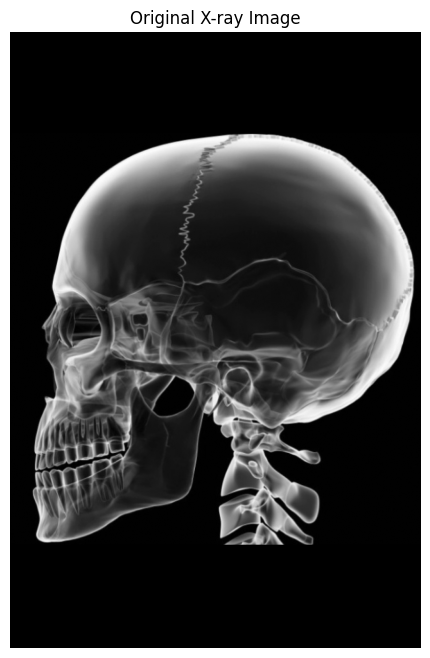

In [10]:
# Load the X-ray image
# Replace 'xray.jpg' with your image path
image = cv2.imread('s2.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.title('Original X-ray Image')
plt.axis('off')
plt.show()

## 2. Two-Level Wavelet Transform Implementation

Now we'll implement the two-level wavelet transform using the PyWavelets library. We'll use the 'db1' (Daubechies 1) wavelet, which is suitable for edge detection in medical images.

In [11]:
# Perform first level 2D DWT
coeffs1 = pywt.dwt2(image, 'db1')
LL1, (LH1, HL1, HH1) = coeffs1

# Perform second level 2D DWT on LL1
coeffs2 = pywt.dwt2(LL1, 'db1')
LL2, (LH2, HL2, HH2) = coeffs2

# Function to normalize and convert to uint8 for display
def normalize_for_display(img):
    img_min = np.min(img)
    img_max = np.max(img)
    img_normalized = ((img - img_min) * 255 / (img_max - img_min)).astype('uint8')
    return img_normalized

## 3. Display and Analyze Sub-Bands

Now we'll visualize and analyze all the sub-bands from both levels of decomposition.

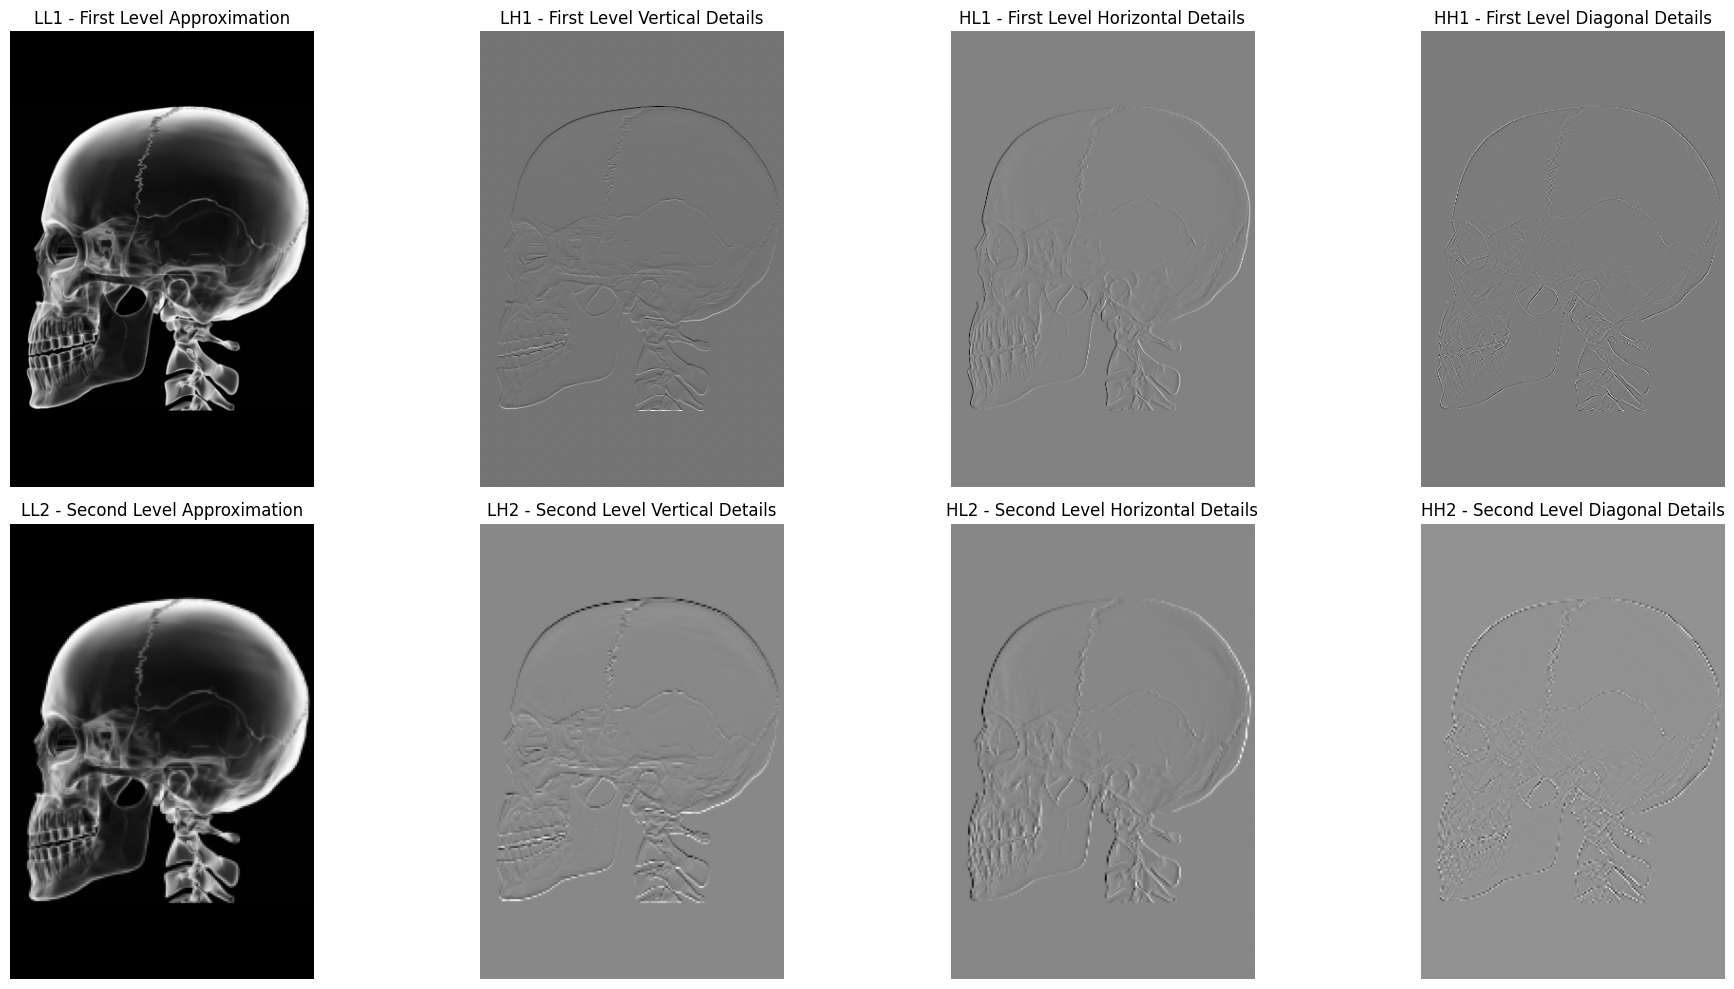

In [12]:
# Create a figure for displaying all sub-bands
plt.figure(figsize=(20, 10))

# Level 1 sub-bands
plt.subplot(241)
plt.imshow(normalize_for_display(LL1), cmap='gray')
plt.title('LL1 - First Level Approximation')
plt.axis('off')

plt.subplot(242)
plt.imshow(normalize_for_display(LH1), cmap='gray')
plt.title('LH1 - First Level Vertical Details')
plt.axis('off')

plt.subplot(243)
plt.imshow(normalize_for_display(HL1), cmap='gray')
plt.title('HL1 - First Level Horizontal Details')
plt.axis('off')

plt.subplot(244)
plt.imshow(normalize_for_display(HH1), cmap='gray')
plt.title('HH1 - First Level Diagonal Details')
plt.axis('off')

# Level 2 sub-bands
plt.subplot(245)
plt.imshow(normalize_for_display(LL2), cmap='gray')
plt.title('LL2 - Second Level Approximation')
plt.axis('off')

plt.subplot(246)
plt.imshow(normalize_for_display(LH2), cmap='gray')
plt.title('LH2 - Second Level Vertical Details')
plt.axis('off')

plt.subplot(247)
plt.imshow(normalize_for_display(HL2), cmap='gray')
plt.title('HL2 - Second Level Horizontal Details')
plt.axis('off')

plt.subplot(248)
plt.imshow(normalize_for_display(HH2), cmap='gray')
plt.title('HH2 - Second Level Diagonal Details')
plt.axis('off')

plt.tight_layout()
plt.show()

## 4. Resolution Variation Analysis

Let's analyze the resolution variation between the two levels and calculate some quantitative metrics to understand the differences.

In [13]:
# Function to calculate energy of a sub-band
def calculate_energy(sub_band):
    return np.sum(np.square(sub_band))

# Calculate and compare energies
energy_metrics = {
    'Level 1': {
        'LL': calculate_energy(LL1),
        'LH': calculate_energy(LH1),
        'HL': calculate_energy(HL1),
        'HH': calculate_energy(HH1)
    },
    'Level 2': {
        'LL': calculate_energy(LL2),
        'LH': calculate_energy(LH2),
        'HL': calculate_energy(HL2),
        'HH': calculate_energy(HH2)
    }
}

# Print analysis
print("Energy Distribution Analysis:\n")
print("Level 1:")
for band, energy in energy_metrics['Level 1'].items():
    print(f"{band}: {energy:,.2f}")
print("\nLevel 2:")
for band, energy in energy_metrics['Level 2'].items():
    print(f"{band}: {energy:,.2f}")

# Calculate and print the resolution reduction ratio
resolution_ratio = LL1.shape[0] / LL2.shape[0]
print(f"\nResolution reduction ratio from Level 1 to Level 2: {resolution_ratio:.2f}x")

Energy Distribution Analysis:

Level 1:
LL: 2,503,053,919.75
LH: 8,766,894.75
HL: 8,423,225.75
HH: 492,144.75

Level 2:
LL: 2,458,797,976.94
LH: 20,249,591.94
HL: 21,181,129.94
HH: 2,825,220.94

Resolution reduction ratio from Level 1 to Level 2: 2.00x


## Analysis Summary

1. **First Level Decomposition (Level 1)**:
   - LL1: Contains the primary low-frequency components, representing the basic structure of the image
   - LH1: Highlights vertical edges at the first level of detail
   - HL1: Captures horizontal edges at the first level of detail
   - HH1: Shows diagonal details and high-frequency noise

2. **Second Level Decomposition (Level 2)**:
   - LL2: Further refined low-frequency approximation, showing core structures
   - LH2: More focused vertical edge detection at a coarser scale
   - HL2: More focused horizontal edge detection at a coarser scale
   - HH2: Refined diagonal details at a coarser scale

3. **Resolution Variation Analysis**:
   - Each level of decomposition reduces the resolution by approximately 2x in each dimension
   - Level 2 provides a more focused view of larger structures while sacrificing fine details
   - The energy distribution between levels shows how the image information is preserved and transformed

4. **Clinical Implications**:
   - Two-level decomposition allows for multi-scale analysis of medical features
   - Different bands highlight different aspects of the image that might be clinically relevant
   - The hierarchical analysis helps in identifying both major structures and subtle details